Download FASTER R CNN https://github.com/sovit-123/fasterrcnn-pytorch-training-pipeline.git

In [2]:
cd fasterrcnn-pytorch-training-pipeline-main/

C:\Users\MONSTER\Desktop\AP\FRCNN\fasterrcnn-pytorch-training-pipeline-main


In [3]:
!pip install -r requirements.txt

  Using cached scikit_learn-1.4.2-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached typing_extensions-4.11.0-py3-none-any.whl.metadata (3.0 kB)
     ---------------------------------------- 0.0/107.3 kB ? eta -:--:--
     -------------- ------------------------ 41.0/107.3 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 107.3/107.3 kB 1.2 MB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached gitdb-4.0.11-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.1-py3-none-any.whl.metadata (4.3 kB)
  Using cached jsonpointer-2.4-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached uri_template-1.3.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached arrow-1.3.0-py3-none-any.whl.metadata (7.5 kB)
   ---------------------------------------- 0.0/952.4 kB 

Dataset txt to xml

In [68]:
cd ../

C:\Users\MONSTER\Desktop\AP\FRCNN


In [80]:
import os
import re
from PIL import Image

folder_holding_yolo_files = r"your/main/root/fasterrcnn-pytorch-training-pipeline-main\data\dataset\val"
yolo_class_list_file = r"your/main/root/fasterrcnn-pytorch-training-pipeline-main\data\dataset\train\classes.txt "

# Get a list of all the classes used in the yolo format
with open(yolo_class_list_file) as f:
    yolo_classes = f.readlines()
array_of_yolo_classes = [x.strip() for x in yolo_classes]

# Description of Yolo Format values
# 15 0.448743 0.529142 0.051587 0.021081
# class_number x_yolo y_yolo yolo_width yolo_height

def is_number(n):
  try:
    float(n)
    return True
  except ValueError:
    return False

os.chdir(folder_holding_yolo_files)

if not os.path.exists(folder_holding_yolo_files + os.sep + 'XML'):
  # If an XML folder does not already exist, make one
  os.mkdir('XML')

for each_yolo_file in os.listdir(folder_holding_yolo_files):
  if each_yolo_file.endswith("txt"):
    the_file = open(each_yolo_file, 'r')
    all_lines = the_file.readlines()
    image_name = each_yolo_file

    # Check to see if there is an image that matches the txt file
    if os.path.exists(each_yolo_file.replace('txt', 'jpeg')):
      image_name = each_yolo_file.replace('txt', 'jpeg')
    if os.path.exists(each_yolo_file.replace('txt', 'jpg')):
      image_name = each_yolo_file.replace('txt', 'jpg')
    if os.path.exists(each_yolo_file.replace('txt', 'png')):
      image_name = each_yolo_file.replace('txt', 'png')

    if not image_name == each_yolo_file:
      # If the image name is the same as the yolo filename
      # then we did NOT find an image that matches, and we will skip this code block
      orig_img = Image.open(image_name) # open the image
      image_width = orig_img.width
      image_height = orig_img.height

      # Start the XML file
      with open('XML' + os.sep + each_yolo_file.replace('txt', 'xml'), 'w') as f:
        f.write('<annotation>\n')
        f.write('\t<folder>XML</folder>\n')
        f.write('\t<filename>' + image_name + '</filename>\n')
        f.write('\t<path>' + os.getcwd() + os.sep + image_name + '</path>\n')
        f.write('\t<source>\n')
        f.write('\t\t<database>Unknown</database>\n')
        f.write('\t</source>\n')
        f.write('\t<size>\n')
        f.write('\t\t<width>' + str(image_width) + '</width>\n')
        f.write('\t\t<height>' + str(image_height) + '</height>\n')
        f.write('\t\t<depth>3</depth>\n') # assuming a 3 channel color image (RGB)
        f.write('\t</size>\n')
        f.write('\t<segmented>0</segmented>\n')
      
        for each_line in all_lines:
          # regex to find the numbers in each line of the text file
          yolo_array = re.split("\s", each_line.rstrip()) # remove any extra space from the end of the line

          # initalize the variables
          class_number = 0
          x_yolo = 0.0
          y_yolo = 0.0
          yolo_width = 0.0
          yolo_height = 0.0
          yolo_array_contains_only_digits = True

          # make sure the array has the correct number of items
          if len(yolo_array) == 5:
            for each_value in yolo_array:
              # If a value is not a number, then the format is not correct, return false
              if not is_number(each_value):
                yolo_array_contains_only_digits = False
            
            if yolo_array_contains_only_digits:
              # assign the variables
              class_number = int(yolo_array[0])
              object_name = array_of_yolo_classes[class_number]
              x_yolo = float(yolo_array[1])
              y_yolo = float(yolo_array[2])
              yolo_width = float(yolo_array[3])
              yolo_height = float(yolo_array[4])

              # Convert Yolo Format to Pascal VOC format
              box_width = yolo_width * image_width
              box_height = yolo_height * image_height
              x_min = str(int(x_yolo * image_width - (box_width / 2)))
              y_min = str(int(y_yolo * image_height - (box_height / 2)))
              x_max = str(int(x_yolo * image_width + (box_width / 2)))
              y_max = str(int(y_yolo * image_height + (box_height / 2)))

              # write each object to the file
              f.write('\t<object>\n')
              f.write('\t\t<name>' + object_name + '</name>\n')
              f.write('\t\t<pose>Unspecified</pose>\n')
              f.write('\t\t<truncated>0</truncated>\n')
              f.write('\t\t<difficult>0</difficult>\n')
              f.write('\t\t<bndbox>\n')
              f.write('\t\t\t<xmin>' + x_min + '</xmin>\n')
              f.write('\t\t\t<ymin>' + y_min + '</ymin>\n')
              f.write('\t\t\t<xmax>' + x_max + '</xmax>\n')
              f.write('\t\t\t<ymax>' + y_max + '</ymax>\n')
              f.write('\t\t</bndbox>\n')
              f.write('\t</object>\n')

        # Close the annotation tag once all the objects have been written to the file
        f.write('</annotation>\n')
        f.close() # Close the file

# Check to make sure the sprite file is now in the folder
if os.path.exists("XML"):
  print("Conversion complete")
else:
  print("There was a problem converting the files")

Conversion complete


In [59]:
cd fasterrcnn-pytorch-training-pipeline-main/

[WinError 2] Sistem belirtilen dosyayı bulamıyor: 'fasterrcnn-pytorch-training-pipeline-main/'
C:\Users\MONSTER\Desktop\AP\FRCNN\fasterrcnn-pytorch-training-pipeline-main


In [6]:
%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: 'data/dataset/train'
TRAIN_DIR_LABELS: 'data/dataset/labels/trainxml'
VALID_DIR_IMAGES: 'data/dataset/val'
VALID_DIR_LABELS: 'data/dataset/labels/valxml'

# Class names.
CLASSES: [
    '__background__',
    'kolye',
    'port',
    'cihaz',
    'endo'
    #'0',
    #'1',
    #'2',
    #'3'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 5

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Overwriting data_configs/custom_data.yaml


Model Yükleme Ve Eğitim

In [57]:
cd fasterrcnn-pytorch-training-pipeline-main

[WinError 2] Sistem belirtilen dosyayı bulamıyor: 'fasterrcnn-pytorch-training-pipeline-main'
C:\Users\MONSTER\Desktop\AP\FRCNN\fasterrcnn-pytorch-training-pipeline-main


In [7]:
!python train.py --data data_configs/custom_data.yaml --epochs 5 --model fasterrcnn_resnet50_fpn_v2 --name custom_training --batch 8 --disable-wandb

Not using distributed mode
device cuda
Checking Labels and images...
Checking Labels and images...
Creating data loaders
Number of training samples: 9633
Number of validation samples: 1120

Building model from scratch...
FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(640,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_

C:\Users\MONSTER\.conda\envs\FRCNN\lib\site-packages\albumentations\core\composition.py:151: UserWarning: Got processor for bboxes, but no transform to process it.
  warnings.warn(f"Got processor for {proc.default_data_name}, but no transform to process it.")

100%|##########| 9633/9633 [00:00<00:00, 10550.87it/s]

100%|##########| 1120/1120 [00:00<00:00, 68338.97it/s]
INFO:utils.logging:Epoch: [0]  [   0/1205]  eta: 20:29:47  lr: 0.000002  loss: 1.8905 (1.8905)  loss_classifier: 1.7419 (1.7419)  loss_box_reg: 0.0362 (0.0362)  loss_objectness: 0.1060 (0.1060)  loss_rpn_box_reg: 0.0063 (0.0063)  time: 61.2342  data: 42.1983  max mem: 7764
Epoch: [0]  [   0/1205]  eta: 20:29:47  lr: 0.000002  loss: 1.8905 (1.8905)  loss_classifier: 1.7419 (1.7419)  loss_box_reg: 0.0362 (0.0362)  loss_objectness: 0.1060 (0.1060)  loss_rpn_box_reg: 0.0063 (0.0063)  time: 61.2342  data: 42.1983  max mem: 7764
INFO:utils.logging:Epoch: [0]  [ 100/1205]  eta: 9:29:48  lr: 0.000102  loss: 0.3279 (0.9656)  loss

In [9]:
import matplotlib.pyplot as plt
import glob as glob

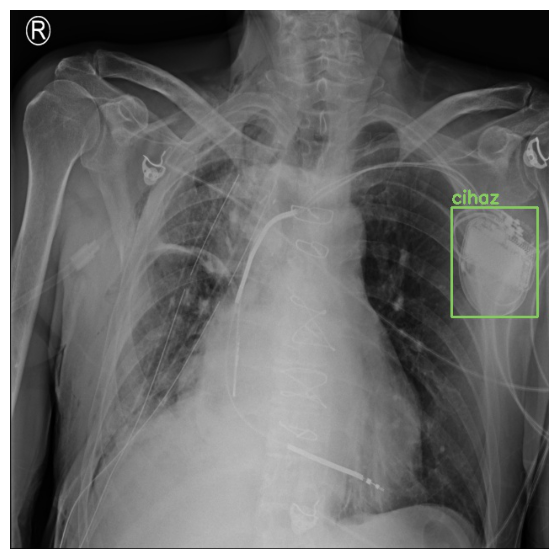

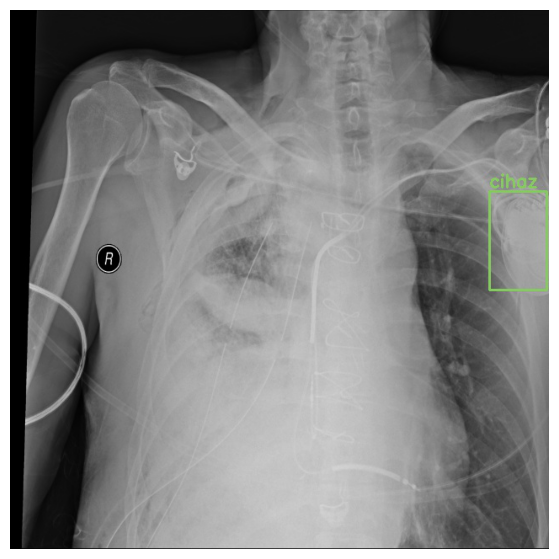

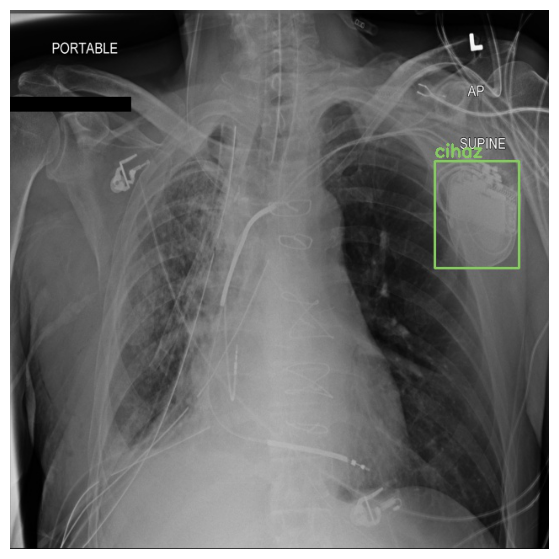

In [10]:
results_dir_path = r"C:\Users\MONSTER\Desktop\AP\FRCNN\fasterrcnn-pytorch-training-pipeline-main\outputs\training\custom_training"
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(3):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

İmport trained model and testing

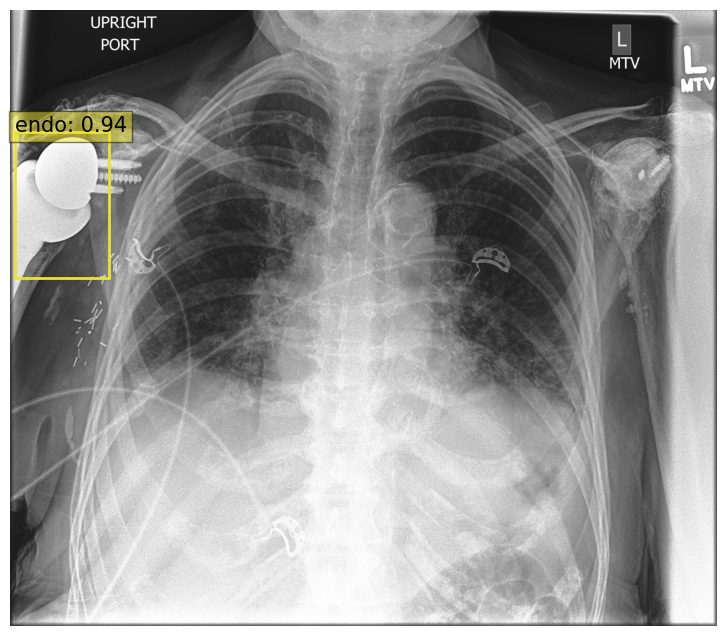

In [22]:
import torch
from torchvision import models
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Eğitilmiş modelinize göre sınıf sayısını ayarlayın
num_classes = 5  # Arka plan dahil sınıf sayısı

# Modeli tanımlayın (önceden eğitilmiş model olmadan)
model = models.detection.fasterrcnn_resnet50_fpn_v2(weights=None)

# Mevcut modelin başlatılması
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# Eğitilmiş ağırlıkları yükleyin
checkpoint = torch.load(r'your/main/root/fasterrcnn-pytorch-training-pipeline-main\outputs\training\custom_training\best_model.pth')
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# Görüntü dönüşümleri
transform = T.Compose([
    T.ToTensor(),
])

# Görüntüyü yükle ve dönüştür
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    return transform(image)

# Test etmek istediğiniz bir görüntü yolu
test_image_path = r"your/main/root/fasterrcnn-pytorch-training-pipeline-main\data\test\648.png"
image = load_image(test_image_path)

# Görüntüyü modele gönder ve tahminleri al
with torch.no_grad():
    prediction = model([image])

# Tahminleri işleyin ve görselleştirin
def plot_predictions(image, predictions):
    plt.figure(figsize=(12, 8))
    plt.imshow(image.permute(1, 2, 0).numpy())
    ax = plt.gca()

    # Sınıf adları ve renkler
    COCO_INSTANCE_CATEGORY_NAMES = ['__background__','kolye','port','cihaz','endo']  # COCO sınıf adları veya sizin sınıflarınız
    COLORS = np.random.uniform(0, 255, size=(len(COCO_INSTANCE_CATEGORY_NAMES), 3))

    for elem in range(len(predictions[0]['boxes'])):
        box = predictions[0]['boxes'][elem].numpy()
        label = predictions[0]['labels'][elem].numpy()
        score = predictions[0]['scores'][elem].numpy()

        if score > 0.5:  # Belirli bir eşik değer üzerinde olan tahminleri görselleştir
            color = COLORS[label]
            rect = plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, color=color/255, linewidth=2)
            ax.add_patch(rect)
            plt.text(box[0], box[1], f'{COCO_INSTANCE_CATEGORY_NAMES[label]}: {score:.2f}', fontsize=15, bbox=dict(facecolor=color/255, alpha=0.5))

    plt.axis('off')
    plt.show()

# Tahminleri görselleştirin
plot_predictions(image, prediction)
